In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

#데이터 로드
data = pd.read_csv('D:\OneDrive\문서\GitHub\TIL\MachineLearning\비지도학습\군집화 모델\Mall_Customers.csv')

#데이터 확인
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [2]:
#필요한 열 선택
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

#데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

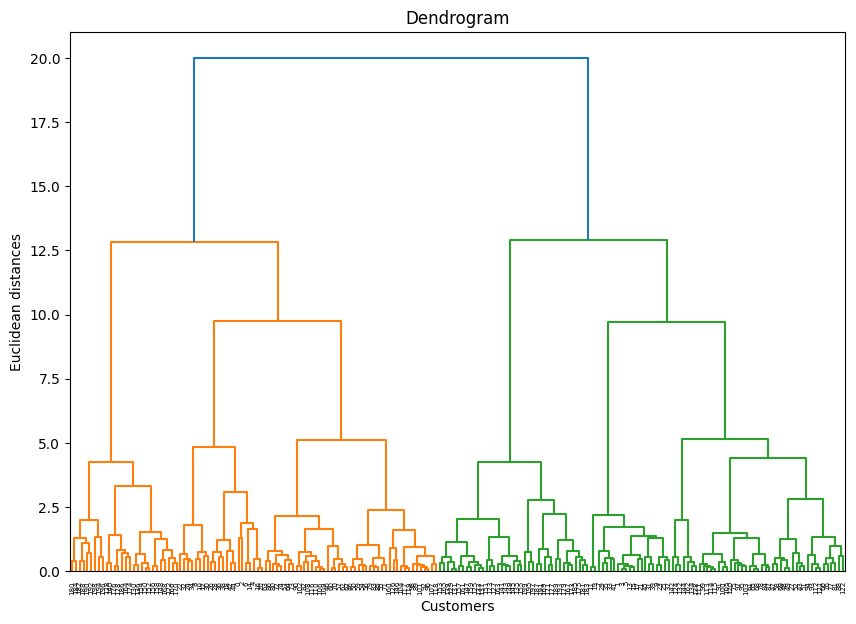

In [3]:
#덴드로그램 생성
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

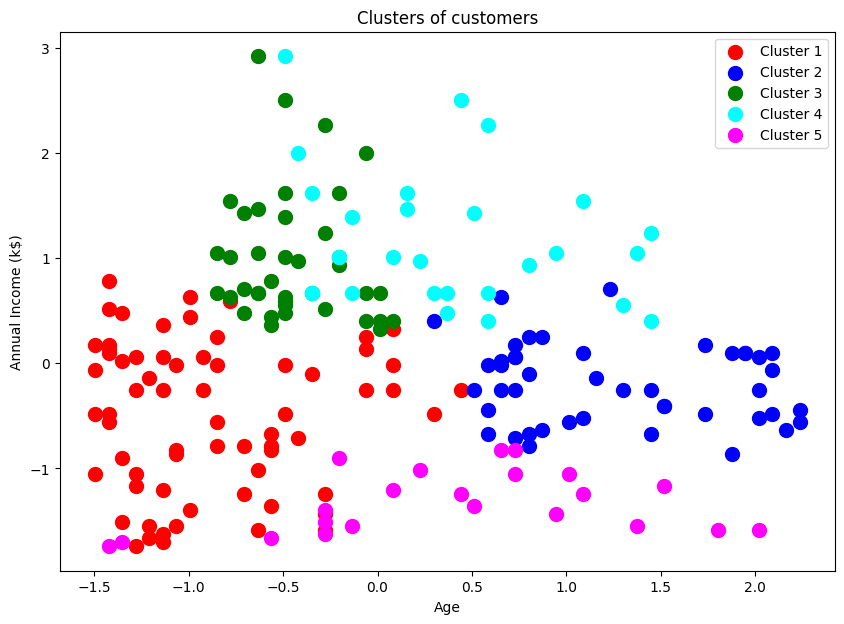

In [4]:
#계층적 군집화 모델 생성
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

#모델 학습 및 예측
y_hc = hc.fit_predict(X_scaled)

#결과 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[y_hc == 0, 0], X_scaled[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_hc == 1, 0], X_scaled[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_hc == 2, 0], X_scaled[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_hc == 3, 0], X_scaled[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_hc == 4, 0], X_scaled[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

In [6]:
from sklearn.metrics import silhouette_score

# 실루엣 점수 계산
silhouette_avg = silhouette_score(X_scaled, y_hc)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.39002826186267214


실루엣 계수 - 비지도 학습 특성상 정확하고 절대적 성능 평가는 어렵다. 하지만 실루엣 계수는 군집화가 효율적으로 잘 됐는지를 평가할 수 있는 지표다.